In [1]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv(r"../../data/processed/emotet.csv")

## EDA

### Categorical

In [3]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,7,TCP,74.92%
1,Flags,15,SYN,50.66%
2,Label,2,Benign,54.63%
3,direction,2,outbound,75.21%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,60684,74.921293
1,HTTP,14216,17.551267
2,DATA-TEXT-LINES,4743,5.855772
3,DNS,1328,1.639567
4,XML,24,0.029631
5,LLMNR,1,0.001235
6,NBNS,1,0.001235


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,SYN,41036,50.663605
1,"PSH,ACK",18926,23.366298
2,"FIN,SYN,ACK",9294,11.474499
3,"SYN,RST,ACK",6277,7.749670
4,"FIN,SYN,RST,ACK",2958,3.651987
5,UNK,1330,1.642036
6,"FIN,SYN,PSH,ACK",556,0.686445
7,"SYN,ACK",289,0.356803
8,"FIN,SYN,RST,PSH,ACK",119,0.146919
9,"SYN,RST",64,0.079015


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,44252,54.634122
1,Emotet,36745,45.365878


---

### Column: direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,60915,75.206489
1,inbound,20082,24.793511


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Mean,9.185426e+04,4.470432e+04,1.990138e+04,2.940171,3.191268e+02,153.082612,2.643735e+05,1.049990e+08,0.0,0.012852,1.762004,0.749188,0.476141,0.160315,0.175513,0.752645,0.268751,0.264368
Median,8.999657e+00,5.381000e+04,8.080000e+03,3.000000,1.940000e+02,64.666667,3.333462e-01,2.155642e+01,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,1.000000e-06,8.080000e+03,8.080000e+03,3.000000,1.940000e+02,64.666667,1.000000e+06,4.790000e+08,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,3.937669e+05,2.178363e+04,2.099161e+04,3.496667,3.891681e+03,184.007254,4.409954e+05,2.051226e+08,0.0,0.112638,0.920859,0.433483,0.499434,0.366900,0.380407,0.431477,0.443313,0.440999
Variance,1.550524e+11,4.745267e+08,4.406476e+08,12.226679,1.514518e+07,33858.669601,1.944769e+11,4.207528e+16,0.0,0.012687,0.847982,0.187908,0.249434,0.134615,0.144710,0.186173,0.196526,0.194480
Range,3.037289e+06,6.548100e+04,6.547900e+04,397.000000,4.909780e+05,1344.000000,1.000000e+06,1.398000e+09,0.0,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,1.000000e-06,5.300000e+01,5.300000e+01,1.000000,5.400000e+01,54.000000,6.584985e-07,9.506547e-05,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,3.037289e+06,6.553400e+04,6.553200e+04,398.000000,4.910320e+05,1398.000000,1.000000e+06,1.398000e+09,0.0,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Duration,1.000000,0.038418,-0.077483,0.217041,0.015968,-0.069795,-0.139846,-0.119409,NaN,-0.024715,-0.008038,0.077029,-0.041327,0.003088,-0.045031,0.075601,-0.141418,-0.139842
Source Port,0.038418,1.000000,-0.971424,0.080443,-0.026306,-0.246112,-0.316021,-0.263740,NaN,0.056120,-0.522059,0.348368,-0.562982,-0.493887,-0.101025,0.977949,-0.325211,-0.315999
Destination Port,-0.077483,-0.971424,1.000000,-0.093343,0.022326,0.240782,0.306561,0.260386,NaN,-0.107837,0.510406,-0.336484,0.558544,0.484733,0.109299,-0.990949,0.311984,0.306540
Packets,0.217041,0.080443,-0.093343,1.000000,0.873152,-0.203546,-0.332635,-0.284028,NaN,-0.011370,0.142728,0.317511,-0.033925,0.154755,-0.252349,0.093570,-0.328057,-0.332631
Bytes,0.015968,-0.026306,0.022326,0.873152,1.000000,0.104027,0.012021,0.024543,NaN,-0.002226,0.046250,-0.016382,0.032568,0.016931,0.009569,-0.022067,0.012112,0.012022
Bytes per Packet,-0.069795,-0.246112,0.240782,-0.203546,0.104027,1.000000,0.795215,0.980990,NaN,-0.041502,0.118159,-0.843963,0.499222,-0.220112,0.592362,-0.242441,0.787589,0.795215
Packets per Second,-0.139846,-0.316021,0.306561,-0.332635,0.012021,0.795215,1.000000,0.853883,NaN,0.093906,0.071003,-0.937336,0.473543,-0.257515,0.740718,-0.312725,0.988878,1.000000
Bytes per Second,-0.119409,-0.263740,0.260386,-0.284028,0.024543,0.980990,0.853883,1.000000,NaN,-0.031259,0.118621,-0.870755,0.511113,-0.222425,0.615957,-0.262720,0.844368,0.853883
Is Encrypted Traffic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Common Port Usage,-0.024715,0.056120,-0.107837,-0.011370,-0.002226,-0.041502,0.093906,-0.031259,NaN,1.000000,0.038537,-0.102131,-0.027140,0.050223,-0.052357,0.065413,0.123436,0.093901


### Correlation Matrix Heatmap:

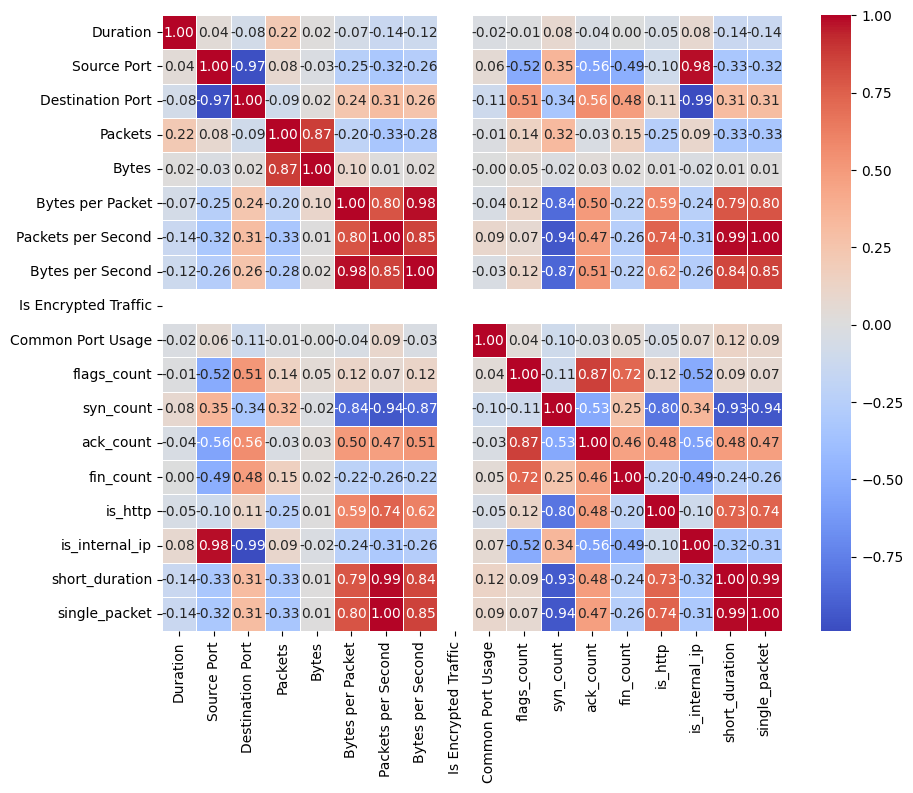

In [4]:
info.numerical_summary()

## Modeling

### Final Data Prep

In [5]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [6]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../../variables/emotet/" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [7]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["flags_count"] = df["flags_count"].astype("float64")
df

,Duration,Source Port,Destination Port,Protocol,Flags,Packets,Bytes,Label,Bytes per Packet,Packets per Second,...,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,direction,short_duration,single_packet
0,0.093964,52334,5355,3,14,2.0,128.0,0,64.000000,21.284747,...,0,1.0,0,0,0,0,1,1,1,0
1,1.501686,137,137,4,14,3.0,276.0,0,92.000000,1.997755,...,0,1.0,0,0,0,0,1,1,0,0
2,0.000001,59869,53,1,14,1.0,76.0,0,76.000000,1000000.000000,...,1,1.0,0,0,0,0,1,1,1,1
3,0.000001,53,59869,1,14,1.0,181.0,0,181.000000,1000000.000000,...,0,1.0,0,0,0,0,0,0,1,1
4,0.000001,64935,53,1,14,1.0,76.0,0,76.000000,1000000.000000,...,1,1.0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,9.001526,54564,8080,5,8,3.0,194.0,0,64.666667,0.333277,...,0,1.0,1,0,0,0,1,1,0,0
80993,16.209324,54565,8080,5,9,4.0,228.0,1,57.000000,0.246772,...,0,2.0,1,1,0,0,1,1,0,0
80994,15.978455,8080,54565,5,2,3.0,166.0,1,55.333333,0.187753,...,0,3.0,1,1,1,0,0,0,0,0
80995,0.000001,54565,8080,2,6,1.0,474.0,1,474.000000,1000000.000000,...,0,2.0,0,1,0,1,1,1,1,1


In [8]:
# df.drop(["Protocol","Packets","Bytes","Duration", "bytes_per_packet","fin_count", "packet_length", "short_duration","Source Port"], axis=1,inplace=True)

### Data Splitting

In [9]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)
print(dropped_df.columns)
# Initialize and apply MinMaxScaler to the dropped_df
scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())

# Create a DataFrame from the scaled dropped_df
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

save_as_pickle(r"../../../variables/emotet/scaler.pkl", scaler)

Index(['Duration', 'Source Port', 'Destination Port', 'Protocol', 'Flags',
       'Packets', 'Bytes', 'Bytes per Packet', 'Packets per Second',
       'Bytes per Second', 'Is Encrypted Traffic', 'Common Port Usage',
       'flags_count', 'syn_count', 'ack_count', 'fin_count', 'is_http',
       'is_internal_ip', 'direction', 'short_duration', 'single_packet'],
      dtype='object')


## Models

### Model Creation and Parameters

In [10]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_neighbors = 5
knn_train_model = KNeighborsClassifier(n_neighbors=n_neighbors)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [11]:
# Reset the index to convert it to a normal column (if needed)
df_reset = df.reset_index(drop=True)  # This will drop the old index column
X = df_reset.drop("Label", axis=1)  # Now drop the Label
if 'index' in X.columns:
    X.drop('index', axis=1, inplace=True)
y = df["Label"]

### KNN

In [45]:
knn_normal = prisma.MachineLearning()
knn_normal_metrics, avg_knn_normal_metrics, knn_normal_model = (
    knn_normal.evaluate_model(X, y, test_size, iterations, knn_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]


### Random Forest

In [46]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model:   3%|▎         | 1/30 [00:16<08:08, 16.85s/it]


KeyboardInterrupt: 

### Logistic Regression

In [12]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:35<00:00,  1.17s/it]


### Model Evaluation

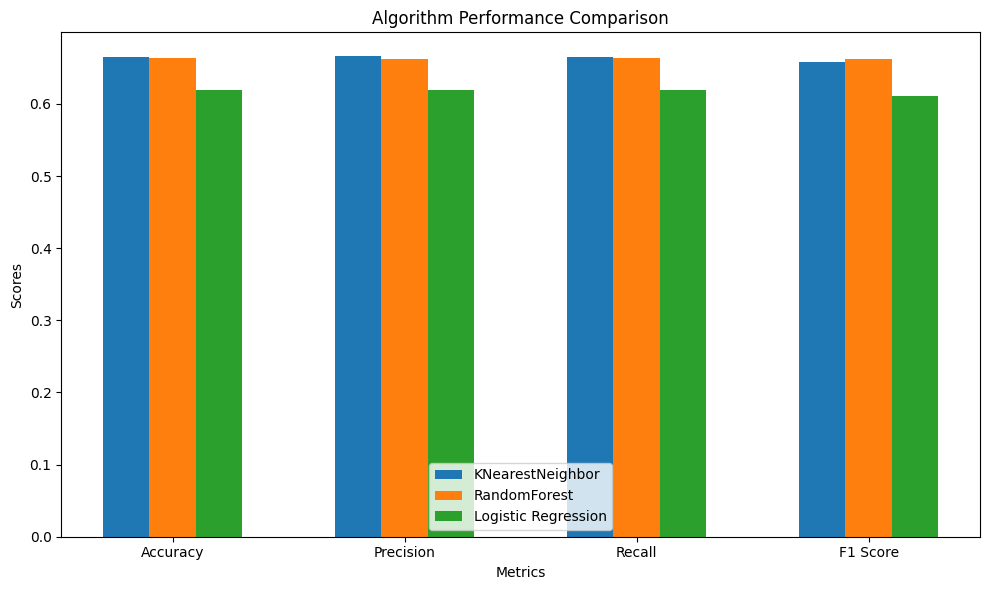

In [20]:
normal_metrics = {"KNearestNeighbor":avg_knn_normal_metrics, "RandomForest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [21]:
normal_metrics

{'KNearestNeighbor': {'Accuracy': 0.665,
  'Precision': 0.666,
  'Recall': 0.665,
  'F1 Score': 0.658},
 'RandomForest': {'Accuracy': 0.664,
  'Precision': 0.663,
  'Recall': 0.664,
  'F1 Score': 0.663},
 'Logistic Regression': {'Accuracy': 0.62,
  'Precision': 0.619,
  'Recall': 0.62,
  'F1 Score': 0.611}}

In [27]:
avg_logreg_normal_metrics


{'Accuracy': 0.647, 'Precision': 0.647, 'Recall': 0.647, 'F1 Score': 0.64}

In [13]:
logreg_normal_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.644444,0.642745,0.644444,0.638346
1,0.645267,0.643807,0.645267,0.638707
2,0.648971,0.647570,0.648971,0.642940
3,0.645638,0.643418,0.645638,0.639814
4,0.650165,0.648706,0.650165,0.643769
5,0.650370,0.648936,0.650370,0.643704
6,0.646461,0.645629,0.646461,0.639548
7,0.641358,0.639977,0.641358,0.635286
8,0.649218,0.647868,0.649218,0.643450
9,0.644403,0.642477,0.644403,0.637913


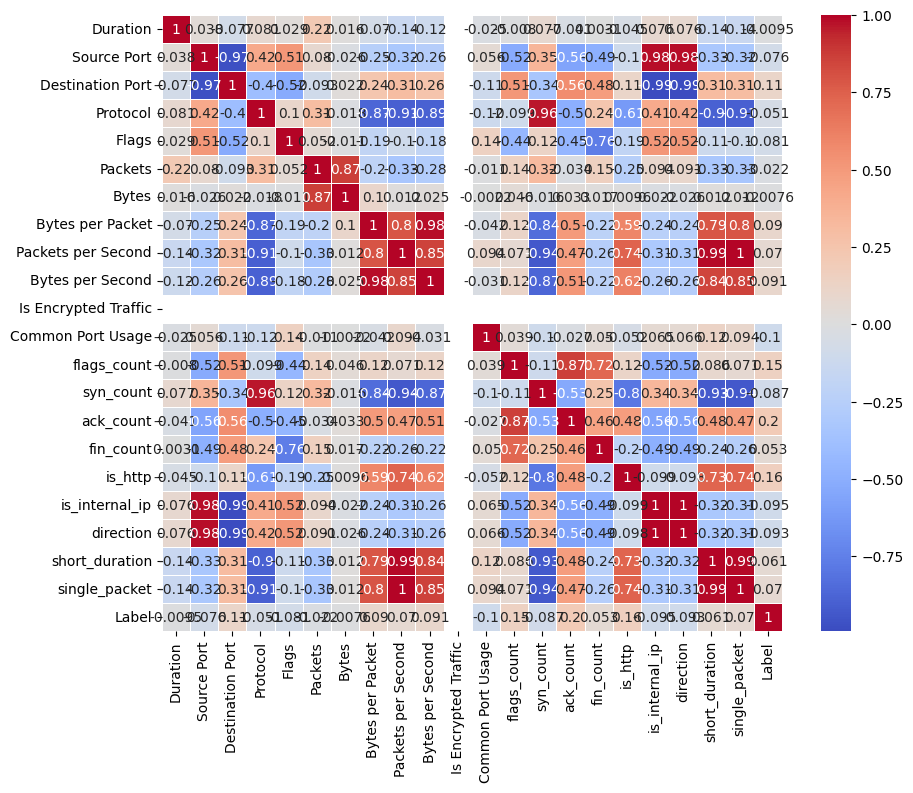

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the heatmap
plt.show()

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

# Define the XGBoost classifier with default settings
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1.2,
    max_depth=3,
    alpha=0.09,  # L1 regularization
    reg_lambda=0.09,        # L2 regularization (formerly lambda_)
    n_estimators=100,  # Control the number of trees
    learning_rate=0.125,  # Decreased learning rate
    subsample=0.8,  # Use 80% of data for training each tree
    colsample_bytree=0.8,  # Use 80% of features for training each tree
    random_state=23  # For reproducibility
)
#! 0.1, 0.11,
# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.7856378600823045
Confusion Matrix:
 [[12914   362]
 [ 4847  6177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83     13276
           1       0.94      0.56      0.70     11024

    accuracy                           0.79     24300
   macro avg       0.84      0.77      0.77     24300
weighted avg       0.83      0.79      0.77     24300



In [16]:
# Check the performance on the training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already have test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.7848387039878654
Test Accuracy: 0.7856378600823045


In [17]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5)

# Print the average accuracy across the folds
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy: 0.739879443099292


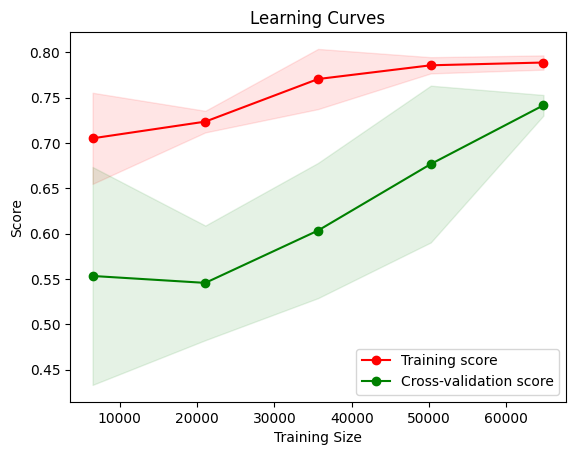

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


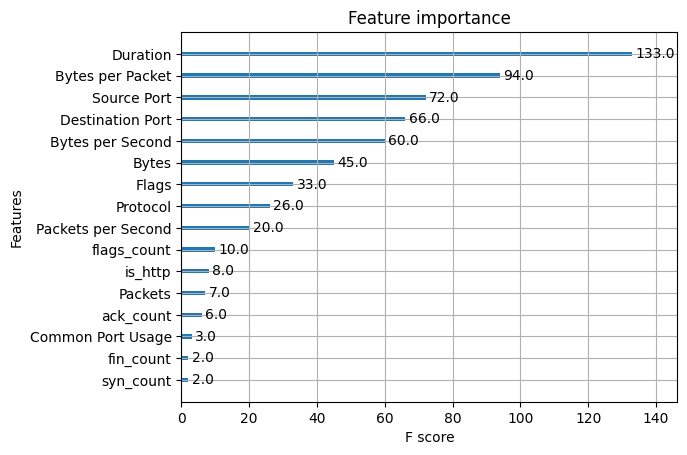

In [19]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [20]:
save_as_pickle(r"../../models/emotet/xgb.pkl", xgb_model)